In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/final oil prices.xlsx")
df.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2015-01-01,54.56,53.73,54.85,53.72,0,-0.2381
1,2015-01-02,71.12,71.12,71.12,71.12,66.40K,0.3034
2,2015-01-05,69.79,69.79,69.79,69.79,110.96K,-0.0187
3,2015-01-06,68.03,68.09,68.09,68.09,0.00K,-0.0252
4,2015-01-07,67.38,67.38,67.38,67.38,0.16K,-0.0096


In [ ]:
df.tail()

,Date,Price,Open,High,Low,Volume,Chg%
2061,2022-10-24,84.58,85.24,85.92,82.63,250.73K,-0.0055
2062,2022-10-25,85.32,84.88,86.03,83.06,240.44K,0.0087
2063,2022-10-26,87.91,85.07,88.41,84.14,287.18K,0.0304
2064,2022-10-27,89.08,88.26,89.79,87.33,292.56K,0.0133
2065,2022-10-28,87.90,88.67,88.76,87.08,263.40K,-0.0132


In [ ]:
df[:5]

,Date,Price,Open,High,Low,Volume,Chg%
0,2015-01-01,54.56,53.73,54.85,53.72,0,-0.2381
1,2015-01-02,71.12,71.12,71.12,71.12,66.40K,0.3034
2,2015-01-05,69.79,69.79,69.79,69.79,110.96K,-0.0187
3,2015-01-06,68.03,68.09,68.09,68.09,0.00K,-0.0252
4,2015-01-07,67.38,67.38,67.38,67.38,0.16K,-0.0096


In [ ]:
df["Date"]=pd.to_datetime(df["Date"])
df["Volume"]=df["Volume"].str.replace("K","")
df["Volume"]=df["Volume"].fillna(0)
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

In [ ]:
df.set_index(["Date"])

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2015-01-01,54.56,53.73,54.85,53.72,0,-0.2381
2015-01-02,71.12,71.12,71.12,71.12,66.40,0.3034
2015-01-05,69.79,69.79,69.79,69.79,110.96,-0.0187
2015-01-06,68.03,68.09,68.09,68.09,0.00,-0.0252
2015-01-07,67.38,67.38,67.38,67.38,0.16,-0.0096
...,...,...,...,...,...,...
2022-10-24,84.58,85.24,85.92,82.63,250.73,-0.0055
2022-10-25,85.32,84.88,86.03,83.06,240.44,0.0087
2022-10-26,87.91,85.07,88.41,84.14,287.18,0.0304


In [ ]:
df=df["Price"]

In [ ]:
from sklearn.preprocessing import StandardScaler
# cols=['Price', 'Open', 'High', 'Low', 'Volume', 'Chg%']
normalizer = StandardScaler()
df= normalizer.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
len(df)

2066

In [ ]:
#Defining test and train data sizes
train_size = int(len(df)*0.7)
test_size = len(df) - train_size

In [ ]:
#Splitting data between train and test
ds_train, ds_test = df[0:train_size], df[train_size:len(df)]

In [ ]:
len(ds_train),len(ds_test)

(1446, 620)

In [ ]:
#creating dataset in time series for LSTM model 
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [ ]:
#Taking 100 days price as one record for training
time_stamp = 50
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [ ]:
X_train.shape,y_train.shape

((1395, 50), (1395,))

In [ ]:
X_test.shape, y_test.shape

((569, 50), (569,))

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
y_train= y_train.reshape(y_train.shape[0], 1)
y_test= y_test.reshape(y_test.shape[0], 1)

In [ ]:
X_test.shape, y_test.shape

((569, 50, 1), (569, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=150,return_sequences=True,input_shape=(X_train.shape[1],1)))
# model.add(LSTM(units=10,return_sequences=True))
# model.add(LSTM(units=10,return_sequences=True))
model.add(LSTM(units=200,activation='linear',dropout=0.3))
model.add(Dense(units=150))
model.add(Dropout(0.6))
# model.add(Dense(units=200))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 150)           91200     
                                                                 
 lstm_5 (LSTM)               (None, 200)               280800    
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 402,301
Trainable params: 402,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# import tensorflow as tf
# tf.convert_to_tensor(X_train.astype(float))
# tf.convert_to_tensor(X_test.astype(float))
# # tf.convert_to_tensor(y_train.astype(float))
# # tf.convert_to_tensor(y_test.astype(float))

In [ ]:
# X_train = np.asarray(X_train)
# X_test = np.asarray(X_test)
# y_train = np.asarray(X_train)
# y_test = np.asarray(y_test)

In [ ]:
from tensorflow import keras
early_stopping = keras.callbacks.EarlyStopping(
    patience=70,
    # min_delta=0.001,
    restore_best_weights=True,
)

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=500,callbacks=[early_stopping],batch_size=32)

Epoch 1/500
44/44 [==============================] - 10s 157ms/step - loss: 0.0600 - val_loss: 0.0585
Epoch 2/500
44/44 [==============================] - 6s 144ms/step - loss: 0.0416 - val_loss: 0.1202
Epoch 3/500
44/44 [==============================] - 9s 207ms/step - loss: 0.0423 - val_loss: 0.1006
Epoch 4/500
44/44 [==============================] - 6s 145ms/step - loss: 0.0405 - val_loss: 0.0553
Epoch 5/500
44/44 [==============================] - 6s 147ms/step - loss: 0.0400 - val_loss: 0.0724
Epoch 6/500
44/44 [==============================] - 7s 149ms/step - loss: 0.0381 - val_loss: 0.1294
Epoch 7/500
44/44 [==============================] - 8s 172ms/step - loss: 0.0382 - val_loss: 0.1379
Epoch 8/500
44/44 [==============================] - 6s 146ms/step - loss: 0.0357 - val_loss: 0.0660
Epoch 9/500
44/44 [==============================] - 6s 145ms/step - loss: 0.0375 - val_loss: 0.0863
Epoch 10/500
44/44 [==============================] - 6s 144ms/step - loss: 0.0370 - val_l

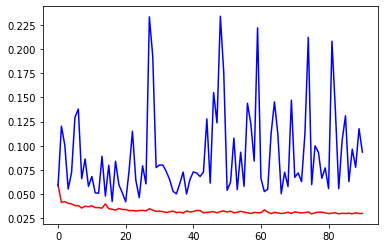

In [ ]:
import matplotlib.pyplot as plt
loss = model.history.history['loss']
plt.plot(loss,c="R")
val_loss = model.history.history['val_loss']
plt.plot(val_loss,c="B")

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(loss,val_loss)

0.005370741884839407

In [ ]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

18/18 [==============================] - 0s 14ms/step


In [ ]:
mean_squared_error(test_predict,y_test)

0.04215797512732002

In [ ]:
r2_score(test_predict,y_test)

0.9774010323485733

In [ ]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

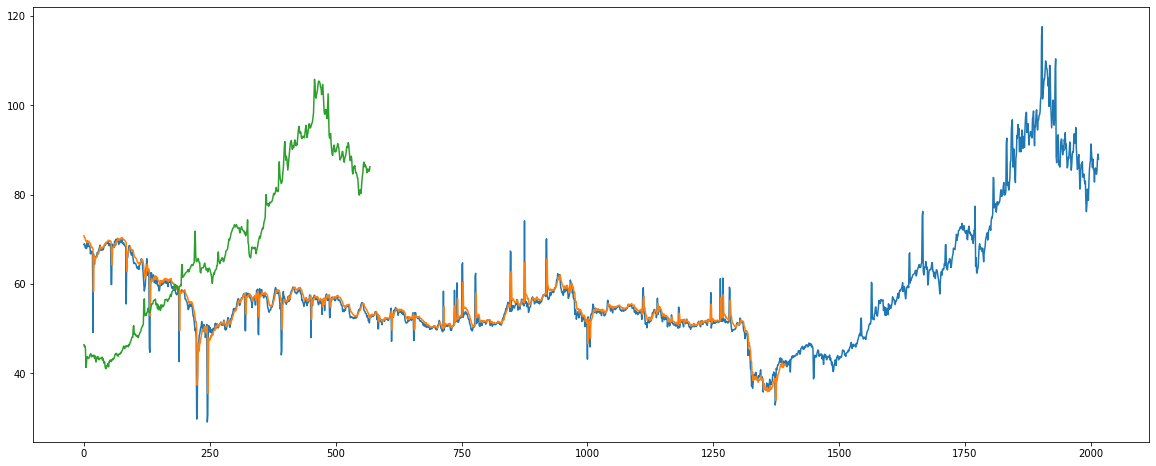

In [ ]:
#Comparing using visuals
plt.figure(figsize=(20,8))
plt.plot(normalizer.inverse_transform(df)[50:])
plt.plot(train_predict)
plt.plot(test_predict)


In [ ]:
type(train_predict)

numpy.ndarray

In [ ]:
test = np.vstack((train_predict,test_predict))

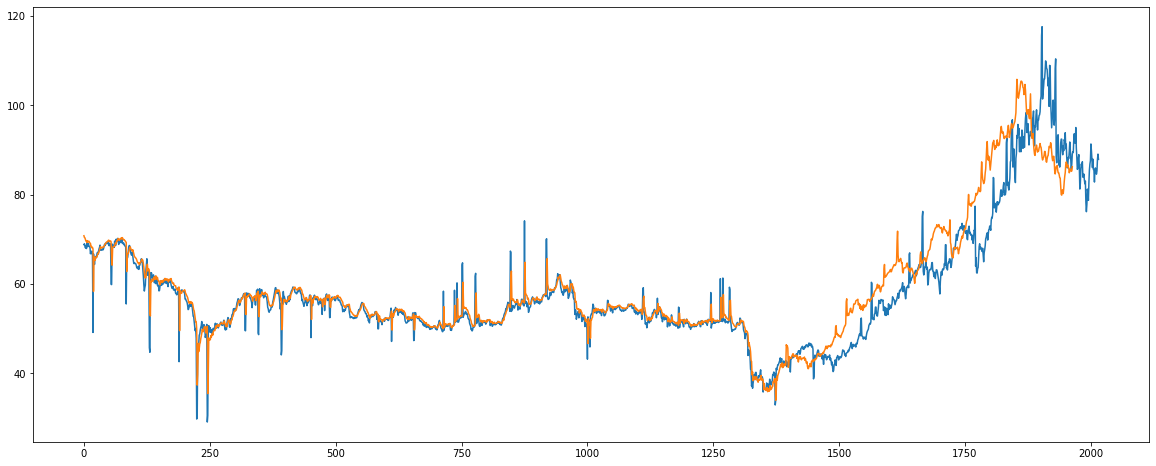

In [ ]:
#Combining the predited data to create uniform data visualization
plt.figure(figsize=(20,8))
plt.plot(normalizer.inverse_transform(df)[50:])
plt.plot(test)

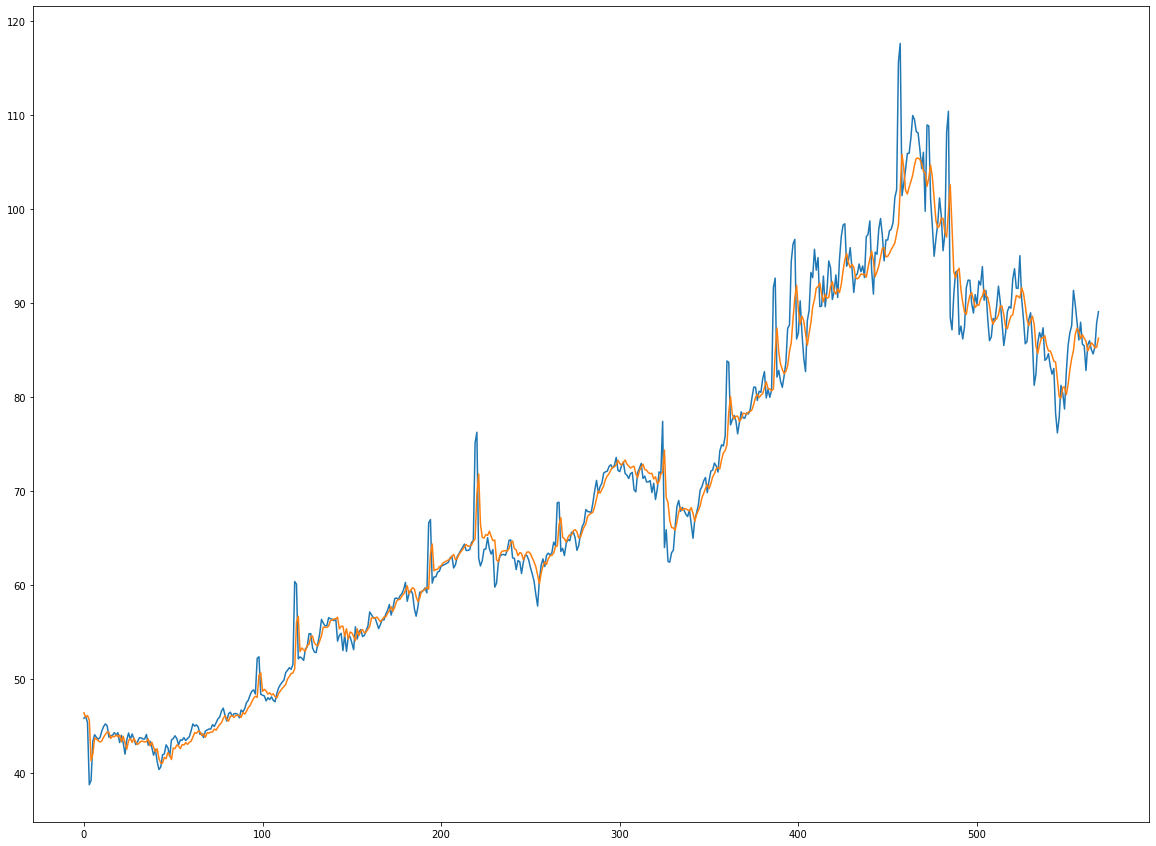

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(normalizer.inverse_transform(y_test))
plt.plot(test_predict)

In [ ]:
len(ds_test)



620

In [ ]:
#Getting the last 50 days records
fut_inp = ds_test[570:]
fut_inp = fut_inp.reshape(1,-1)
tmp_inp = list(fut_inp)
fut_inp.shape

(1, 50)

In [ ]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

Predicting next 64 days(the data used in this notebook ends at 28th october,2022) price suing the current data.

Algorithm below will predict in sliding window manner (algorithm) with stride 1

In [ ]:

lst_output=[]
n_steps=50 #window size
i=0
while(i<64):
    
    if(len(tmp_inp)>50):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[2.1655995845794678], [2.144484043121338], [2.130937337875366], [2.1243040561676025], [2.1209869384765625], [2.1191320419311523], [2.1177752017974854], [2.1164467334747314], [2.1149587631225586], [2.1132678985595703], [2.1113955974578857], [2.109384775161743], [2.1072800159454346], [2.105118751525879], [2.102930784225464], [2.1007373332977295], [2.098552703857422], [2.096386194229126], [2.0942440032958984], [2.0921294689178467], [2.090045928955078], [2.0879950523376465], [2.085977792739868], [2.0839946269989014], [2.0820465087890625], [2.0801329612731934], [2.078254461288452], [2.076411724090576], [2.0746045112609863], [2.0728325843811035], [2.0710947513580322], [2.0693914890289307], [2.0677225589752197], [2.066086769104004], [2.064483165740967], [2.0629122257232666], [2.0613722801208496], [2.0598628520965576], [2.058382987976074], [2.0569334030151367], [2.0555124282836914], [2.0541205406188965], [2.052755832672119], [2.051419496536255], [2.050110340118408], [2.0488274097442627], [2.0

In [ ]:
len(df)

2066

In [ ]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,51)
plot_pred=np.arange(51,115)

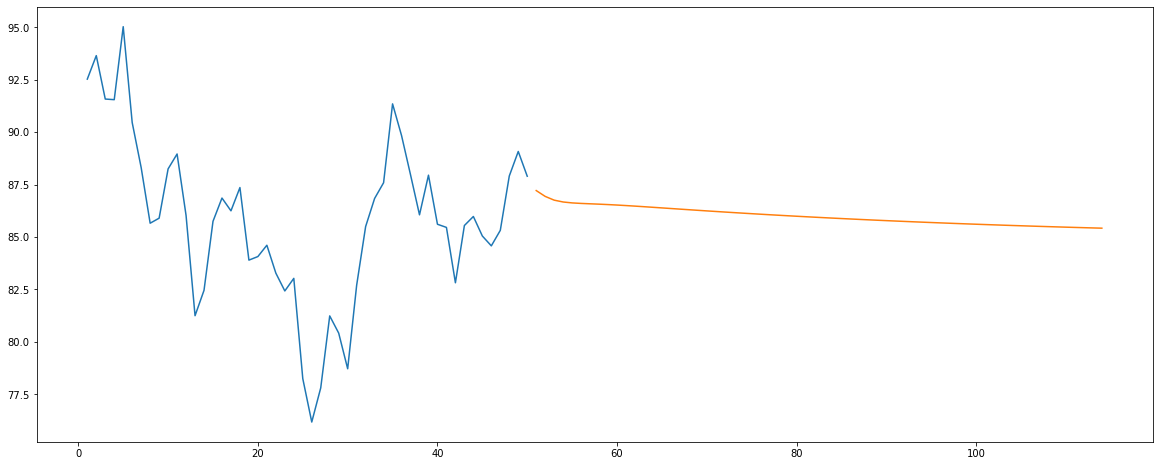

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(plot_new, normalizer.inverse_transform(df[2016:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [ ]:
ds_new = df.tolist()

In [ ]:
len(ds_new)

2066

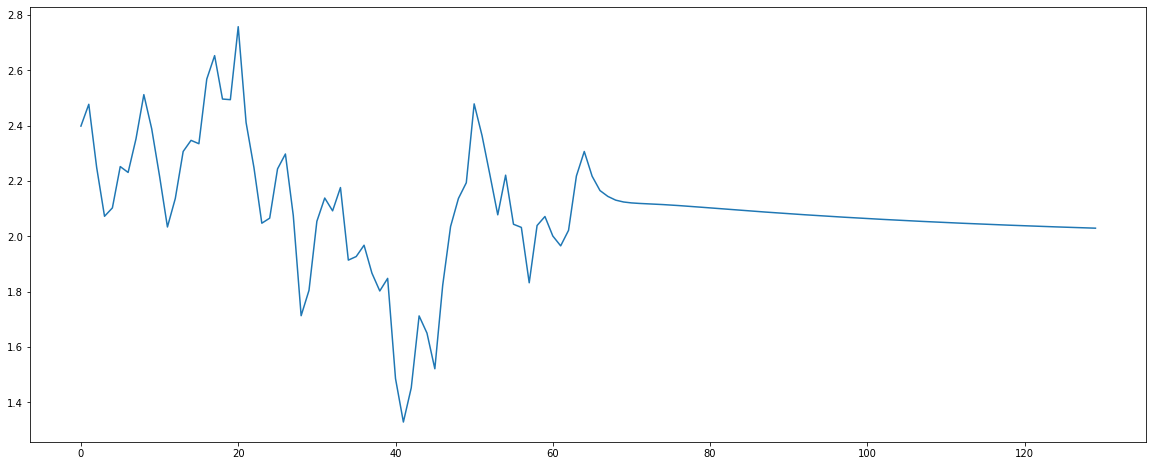

In [ ]:
#Entends helps us to fill the missing value with approx value
plt.figure(figsize=(20,8))
ds_new.extend(lst_output)
plt.plot(ds_new[2000:])

In [ ]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

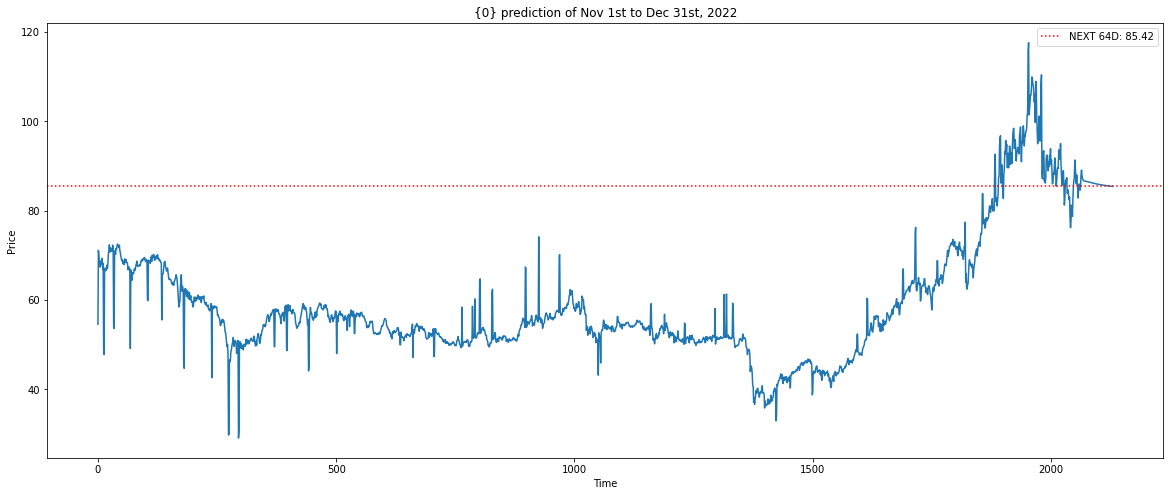

In [ ]:
#Plotting final results with predicted value after 30 Days
plt.figure(figsize=(20,8))
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of Nov 1st to Dec 31st, 2022")
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 64D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()